# MLP 모델

## 데이터 로드
- MNIST 데이터 : 0~9까지로 이루어진 손글씨 숫자 데이터

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
test_images.shape

(10000, 28, 28)

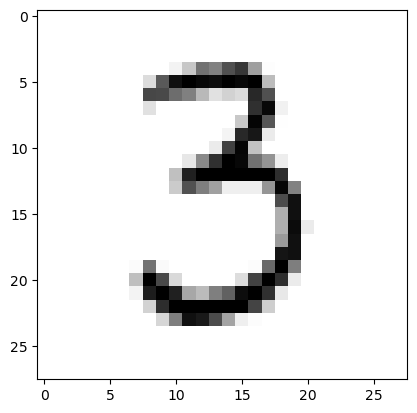

In [3]:
# 데이터 하나만 출력
import matplotlib.pyplot as plt

# plt.imshow(train_images[100], cmap = 'gray') 배경이 검은색
plt.imshow(train_images[50], cmap = plt.cm.binary) # 배경이 하얀색
plt.show()

In [4]:
train_labels[50]

3

## Featrue Engineering

In [6]:
# 이미지 데이터에서는 데이터 범위 수정(0~255 / 정수) > 0~1 / 실수
# 계산량 감소, 분산 감소
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [10]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
# MLP에 학습하기 위해서 이미지 데이터를 1차원으로 변경
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)

In [12]:
# 원 핫 인코딩
from tensorflow.keras.utils import to_categorical

train_label_one = to_categorical(train_labels)
test_label_one = to_categorical(test_labels)

In [13]:
train_images.shape, test_images.shape, train_label_one.shape, test_label_one.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

## 모델 정의

In [14]:
# 딥러닝 모델 설계(MLP)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(units = 256, activation = 'relu', input_dim = 28*28))
model1.add(Dense(units = 10, activation = 'softmax'))

model1.summary()


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


2023-02-14 02:26:26.583626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-14 02:26:26.583756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
# 모델 컴파일하기
model1.compile(loss = 'categorical_crossentropy',# 다중분류
               optimizer = 'Adam',
               metrics = ['accuracy'])

## 모델 학습

In [16]:
# 모델 학습하기
model1.fit(train_images, train_label_one, epochs = 10)

2023-02-14 02:26:44.119331: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-14 02:26:44.119551: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-14 02:26:44.223674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9770 - accuracy: 0.7633
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4052 - accuracy: 0.8903
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3372 - accuracy: 0.9047
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3073 - accuracy: 0.9118
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2873 - accuracy: 0.9171
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2714 - accuracy: 0.9216
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2566 - accuracy: 0.9259
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2428 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2295 - accuracy: 0.9339
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [17]:
# 모델 평가하기
model1.evaluate(test_images,test_label_one)

 26/313 [=>............................] - ETA: 1s - loss: 0.2064 - accuracy: 0.9423

2023-02-14 02:28:52.448033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.2105 - accuracy: 0.9400


[0.2104501575231552, 0.940000057220459]

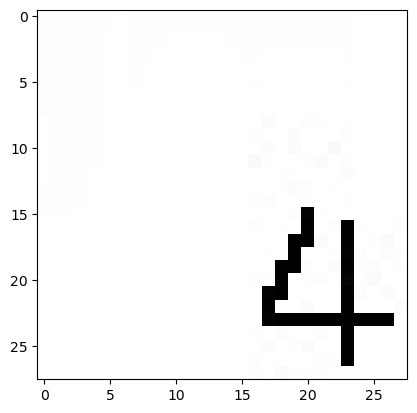

In [21]:
# 직접 그린 손글씨이미지 읽어오기
import PIL.Image as plimg
import numpy as np

gray_img = plimg.open('./data/image4.jpg').convert('L')
plt.imshow(gray_img,cmap = 'gray')
plt.show()

In [22]:
img_pix = np.array(gray_img)
img_pix

array([[254, 254, 254, 253, 254, 254, 255, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 254, 255, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 253, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 255, 255, 254, 254, 254, 255, 255, 255,
        255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 255, 255, 254, 254, 255, 255, 255, 255,
        255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 254, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 255, 255, 254, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 255, 255, 254, 255, 255, 255, 255, 255,
        255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 254, 255, 255,
        255, 255],
       [25

In [23]:
# 255 > 0
# 0 > 255
img_pix = 255-img_pix
img_pix

array([[  1,   1,   1,   2,   1,   1,   0,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   1,   0,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   2,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   0,   0,   1,   1,   1,   0,   0,   0,
          0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   0,   0,   1,   1,   0,   0,   0,   0,
          0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  

In [24]:
img_pix = img_pix.astype('float32') / 255
img_pix = img_pix.reshape((1, 28*28))

In [25]:
model1.predict(img_pix)

2023-02-14 02:30:52.602784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.1029915e-19, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

# CNN 모델 

## 데이터 로드

In [26]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
# 데이터 전처리
# 0 ~ 255 > 0 ~ 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 차원 변환
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

## 모델 정의

In [28]:
# CNN 모델 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# 모델 설계
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model2.add(Conv2D(64, (3, 3), activation="relu"))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Flatten())

model2.add(Dense(128, activation="relu"))
model2.add(Dense(10, activation="softmax"))

In [29]:
# 모델 컴파일
model2.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = 'accuracy')

In [30]:
model2.fit(train_images, train_label_one, epochs = 10)

Epoch 1/10


2023-02-14 02:40:21.399480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 20s 10ms/step - loss: 0.1124 - accuracy: 0.9660
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0363 - accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0228 - accuracy: 0.9925
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - lo

In [31]:
model2.evaluate(test_images, test_label_one)

 16/313 [>.............................] - ETA: 2s - loss: 0.0373 - accuracy: 0.9922

2023-02-14 02:43:50.325953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.0537 - accuracy: 0.9894


[0.05371721461415291, 0.9894000291824341]

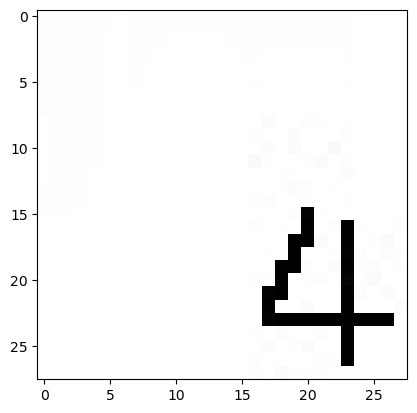

In [33]:
gray_img = plimg.open('./data/image4.jpg').convert('L')
plt.imshow(gray_img,cmap = 'gray')
plt.show()

In [34]:
img_pix = np.array(gray_img)
img_pix

array([[254, 254, 254, 253, 254, 254, 255, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 254, 255, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 253, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 255, 255, 254, 254, 254, 255, 255, 255,
        255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 255, 255, 254, 254, 255, 255, 255, 255,
        255, 255, 254, 254, 255, 255, 255, 255, 255, 255, 254, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 255, 255, 254, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [253, 254, 254, 253, 254, 255, 255, 254, 255, 255, 255, 255, 255,
        255, 255, 255, 254, 255, 255, 255, 255, 255, 255, 254, 255, 255,
        255, 255],
       [25

In [35]:
# 255 > 0
# 0 > 255
img_pix = 255-img_pix
img_pix

array([[  1,   1,   1,   2,   1,   1,   0,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   1,   0,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   2,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   0,   0,   1,   1,   1,   0,   0,   0,
          0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   0,   0,   1,   1,   0,   0,   0,   0,
          0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  2,   1,   1,   2,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  

In [36]:
img_pix = img_pix.astype('float32') / 255
img_pix = img_pix.reshape((1, 28,28,1))

In [37]:
model2.predict(img_pix)

2023-02-14 02:44:21.427647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[2.10456523e-08, 1.32501833e-02, 4.84701008e-01, 8.00688504e-05,
        1.44215584e-01, 9.91062727e-04, 1.27202202e-06, 3.42285722e-01,
        5.29444515e-06, 1.44697325e-02]], dtype=float32)